In [1]:
import pickle
import astropy.units as apu
from galpy.util import bovy_plot
%pylab inline
import tqdm
from galpy.potential.mwpotentials import McMillan17,Irrgang13I
from py import misc

FilePath= '/epsen_data/scr/bennett/Sgr-VerticalWaves/'

Populating the interactive namespace from numpy and matplotlib


# Load in the orbit files

In [4]:
of = np.empty((5,6),dtype='object')

for j in range(5):
    f1= FilePath+"data/Orbits/nofric/osgr_halo"+str(j)+".pickle"
    if j<3:
        with open(f1,"rb") as f:
            of[j,5]= pickle.load(f)
            of[j,5].turn_physical_off()
    for k in range(5):
        f2= FilePath+"data/Orbits/dynfric/osgr_halo"+str(j)+"_sgr"+str(k)+".pickle"
        with open(f2,"rb") as f:
            of[j,k]= pickle.load(f)
            of[j,k].turn_physical_off()
          
potextra= [McMillan17,Irrgang13I]
for j in range(2):
    for k in range(5):
        of[j+3,k]._pot= potextra[j]

## Calculate the time since passing through the disc as well as the speed it was going for each simulation

In [5]:
n_samp= 10010
n_snaps= len(of[0,0][0].time())

times = of[0,0][0].time()
indx= np.linspace(0,n_snaps-1,n_snaps)

vz_through= np.zeros([5,6,n_samp])
t_through= np.zeros([5,6,n_samp])

for j in range(5):
    for k in range(6):
        for i in range(n_samp):
            
            if (j>=3) and (k==5):
                continue
                
            MLU,MVU,MTU,MMU,MDU,MSDU= misc.get_units(of[j,k][i])
            ozz = of[j,k][i].z(times)*MLU
            ovzz = of[j,k][i].vz(times)*MVU
            
            mask= (abs(ozz)<np.roll(abs(ozz),1))*(abs(ozz)<np.roll(abs(ozz),-1))*(indx!=0)
            
            try:
                vz_through[j,k,i]= ovzz[mask][0]
                t_through[j,k,i]= times[mask][0]*MTU/1000.
            except:
                pass

### Save speed and time passing through the disc

In [6]:
with open(FilePath+'data/Orbits/vz_through.dat','wb') as f:
    np.save(f,vz_through)
with open(FilePath+'data/Orbits/t_through.dat','wb') as f:
    np.save(f,t_through)

## Calculate the time since passing through the disc as well as the speed it was going for each simulation

In [7]:
vzmedian= np.zeros([5,6])
vzlstd= np.zeros([5,6])
vzrstd= np.zeros([5,6])

ttmedian= np.zeros([5,6])
ttlstd= np.zeros([5,6])
ttrstd= np.zeros([5,6])

for m in range(5):
    for n in range(6):
        
        if (m>=3) and (n==5):
            continue
            
        vzmedian[m,n]= np.median(vz_through[m,n][vz_through[m,n]!=0])
        vzlstd[m,n]= vzmedian[m,n]-numpy.percentile(vz_through[m,n][vz_through[m,n]!=0],16)
        vzrstd[m,n]= numpy.percentile(vz_through[m,n][vz_through[m,n]!=0],84)-vzmedian[m,n]
        
        ttmedian[m,n]= np.median(t_through[m,n][t_through[m,n]!=0])
        ttlstd[m,n]= ttmedian[m,n]-numpy.percentile(t_through[m,n][t_through[m,n]!=0],16)
        ttrstd[m,n]= numpy.percentile(t_through[m,n][t_through[m,n]!=0],84)-ttmedian[m,n]

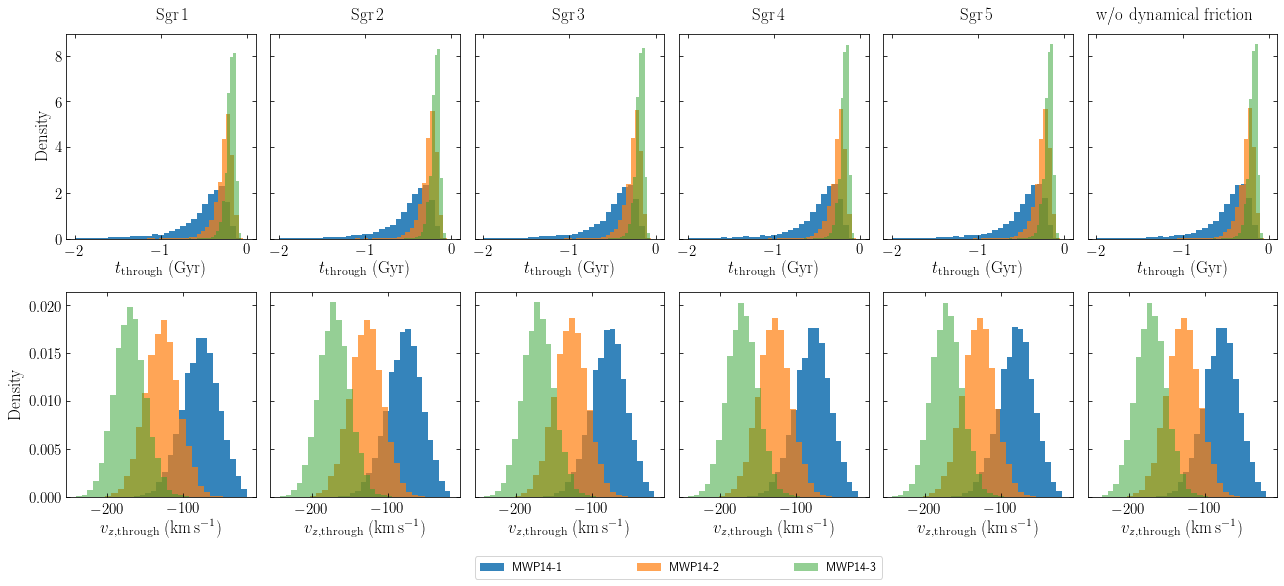

In [9]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
fig,ax= plt.subplots(2,6, sharex='row',sharey='row',figsize=(18,8))
for m in range(3):
    col= "C"+str(m)
    
    for n in range(6):
        ax[0,n].hist(t_through[m,n][t_through[m,n]!=0],bins=31,range=[-2+m*0.5,0],histtype='stepfilled',density=True,color=col,alpha=(3-m)*0.2+0.3)
        ax[1,n].hist(vz_through[m,n][vz_through[m,n]!=0],bins=21,histtype='stepfilled',density=True,color=col,alpha=(3-m)*0.2+0.3,label='MWP14-'+str(m+1))
        ax[0,n].set_xlabel(r'$t_{\mathrm{through}}\,\,\mathrm{ (Gyr)}$')
        ax[1,n].set_xlabel(r'$v_{z,\mathrm{through}}\,\,(\mathrm{ km\,s}^{-1})$')
        ax[0,0].set_ylabel(r'$\mathrm{Density}$')
        ax[1,0].set_ylabel(r'$\mathrm{Density}$')
plt.subplots_adjust(hspace=.0,wspace=0.)

l4 = ax[1,2].legend(bbox_to_anchor=(0.,-0.4,2.15,0.4), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)

plt.gcf().text(0.125, 1., r'$\mathrm{Sgr\,1}$', fontsize=17)
plt.gcf().text(0.275, 1., r'$\mathrm{Sgr\,2}$', fontsize=17)
plt.gcf().text(0.43, 1., r'$\mathrm{Sgr\,3}$', fontsize=17)
plt.gcf().text(0.585, 1., r'$\mathrm{Sgr\,4}$', fontsize=17)
plt.gcf().text(0.745, 1., r'$\mathrm{Sgr\,5}$', fontsize=17)
plt.gcf().text(0.85, 1., r'$\mathrm{w/o\,\,dynamical\,\,friction}$', fontsize=17)

plt.tight_layout()
plt.savefig(FilePath+'plots/MW_SgrOrbits.pdf', bbox_inches = "tight")

Text(0.815,0.9,'$\\mathrm{Sgr\\,5}$')

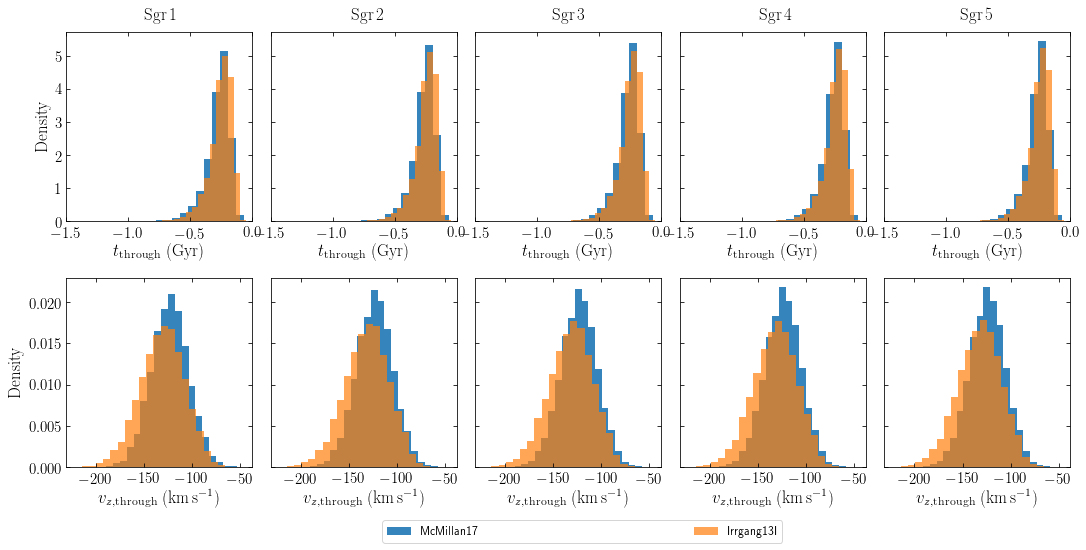

In [10]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
fig,ax= plt.subplots(2,5, sharex='row',sharey='row',figsize=(18,8))
for m in range(2):
    col= "C"+str(m)
    for n in range(5):
        ax[0,n].hist(t_through[m+3,n][t_through[m+3,n]!=0],bins=31,range=[-2+m*0.5,0],histtype='stepfilled',
                     density=True,color=col,alpha=(3-m)*0.2+0.3)
        ax[1,n].hist(vz_through[m+3,n][vz_through[m+3,n]!=0],bins=21,histtype='stepfilled',density=True,
                     color=col,alpha=(3-m)*0.2+0.3,label=['McMillan17','Irrgang13I'][m])
        ax[0,n].set_xlabel(r'$t_{\mathrm{through}}\,\,\mathrm{ (Gyr)}$')
        ax[1,n].set_xlabel(r'$v_{z,\mathrm{through}}\,\,(\mathrm{ km\,s}^{-1})$')
        ax[0,0].set_ylabel(r'$\mathrm{Density}$')
        ax[1,0].set_ylabel(r'$\mathrm{Density}$')
        ax[0,n].set_xlim([-1.5,0.])
plt.subplots_adjust(hspace=0.3,wspace=0.1)

l4 = ax[1,1].legend(bbox_to_anchor=(0.6,-0.4,2.15,0.4), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

plt.gcf().text(0.185, .9, r'$\mathrm{Sgr\,1}$', fontsize=17)
plt.gcf().text(0.345, .9, r'$\mathrm{Sgr\,2}$', fontsize=17)
plt.gcf().text(0.50, .9, r'$\mathrm{Sgr\,3}$', fontsize=17)
plt.gcf().text(0.66, .9, r'$\mathrm{Sgr\,4}$', fontsize=17)
plt.gcf().text(0.815, .9, r'$\mathrm{Sgr\,5}$', fontsize=17)

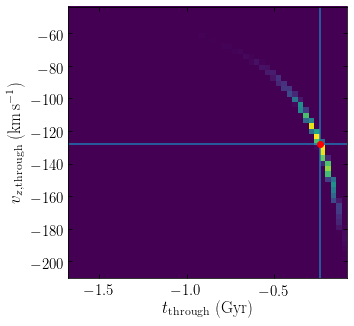

In [11]:
MWI= 1
SgrI= 1
best_orbit= np.argmin((ttmedian[MWI,SgrI]-t_through[MWI,SgrI])**2+(vzmedian[MWI,SgrI]-vz_through[MWI,SgrI])**2)

plt.hist2d(t_through[MWI,SgrI][t_through[MWI,SgrI]!=0],vz_through[MWI,SgrI][vz_through[MWI,SgrI]!=0],bins=[51,51])
plt.xlabel(r'$t_{\mathrm{through}}\,\,\mathrm{ (Gyr)}$')
plt.ylabel(r'$v_{z,\mathrm{through}}\,\,(\mathrm{ km\,s}^{-1})$')
plt.axvline(ttmedian[MWI,SgrI])
plt.axhline(vzmedian[MWI,SgrI])
plt.plot(t_through[MWI,SgrI][best_orbit],vz_through[MWI,SgrI][best_orbit],'ro')

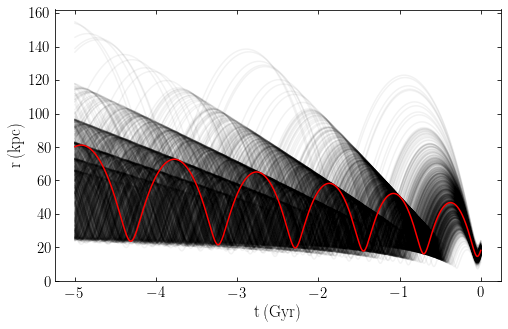

In [12]:
MLU,MVU,MTU,MMU,MDU,MSDU= misc.get_units(of[MWI,SgrI][0])

plt.figure(figsize=(8,5))
for i,o in enumerate(of[MWI][SgrI][::10]):
    o.turn_physical_off()
    plt.plot(o.time()*MTU/1000.,o.r(o.time())*MLU,alpha=0.05,c='k')
plt.xlabel(r'$\mathrm{t\,(Gyr)}$')
plt.ylabel(r'$\mathrm{r\,(kpc)}$')
plt.plot(of[MWI][SgrI][best_orbit].time()*MTU/1000.,of[MWI][SgrI][best_orbit].r(of[MWI][SgrI][best_orbit].time())*MLU,c='r')

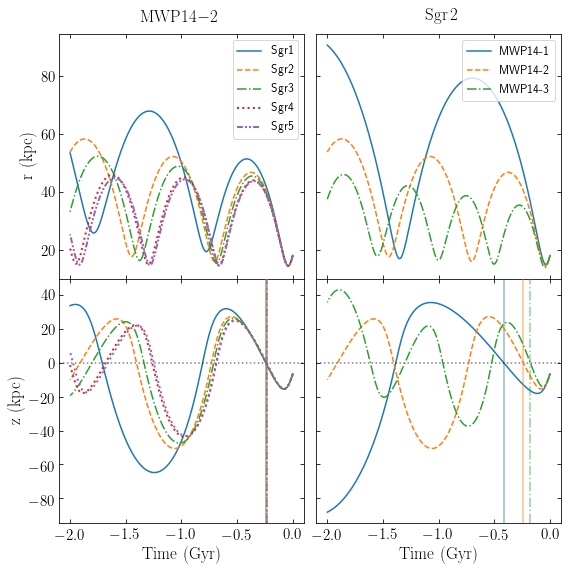

In [13]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
fig,[[ax1,ax3],[ax2,ax4]]= subplots(2,2,figsize=(9,9),sharex=True,sharey='row')

mask= [times*MTU/1000.>=-2]
t= times[tuple(mask)]
ax1.plot(t*MTU/1000.,of[1,0][best_orbit].r(t)*MLU,c='C0',zorder=1,label=r'Sgr1')
ax1.plot(t*MTU/1000.,of[1,1][best_orbit].r(t)*MLU,c='C1',ls='--',zorder=1,label=r'Sgr2')
ax1.plot(t*MTU/1000.,of[1,2][best_orbit].r(t)*MLU,c='C2',ls='-.',zorder=1,label=r'Sgr3')
ax1.plot(t*MTU/1000.,of[1,3][best_orbit].r(t)*MLU,c='C3',ls=':',lw=2,zorder=1,label=r'Sgr4')
ax1.plot(t*MTU/1000.,of[1,4][best_orbit].r(t)*MLU,c='C4',ls=(0, (3, 1, 1, 1, 1, 1)),lw=2,zorder=1,label=r'Sgr5') #Add linestyle!
ax1.set_ylabel(r'$\mathrm{r\,\,(kpc)}$')
ax1.legend()

ax2.plot(t*MTU/1000.,of[MWI][0][best_orbit].z(t)*MLU,c='C0',zorder=1)
ax2.axvline(t_through[MWI,0,[best_orbit]],c='C0',alpha=0.5,zorder=2)
ax2.plot(t*MTU/1000.,of[MWI][1][best_orbit].z(t)*MLU,c='C1',ls='--',zorder=3)
ax2.axvline(t_through[MWI,1,[best_orbit]],c='C1',alpha=0.5,zorder=4)
ax2.plot(t*MTU/1000.,of[MWI][2][best_orbit].z(t)*MLU,c='C2',ls='-.',zorder=5)
ax2.axvline(t_through[MWI,2,[best_orbit]],c='C2',ls='-.',alpha=0.5,zorder=6)
ax2.plot(t*MTU/1000.,of[MWI][3][best_orbit].z(t)*MLU,c='C3',ls=':',lw=2,zorder=7)
ax2.axvline(t_through[MWI,3,[best_orbit]],c='C3',ls=':',lw=2,alpha=0.5,zorder=8)
ax2.plot(t*MTU/1000.,of[MWI][4][best_orbit].z(t)*MLU,c='C4',ls=':',lw=2,zorder=9)
ax2.axvline(t_through[MWI,4,[best_orbit]],c='C4',ls=(0, (3, 1, 1, 1, 1, 1)),lw=2,alpha=0.5,zorder=10)
ax2.axhline(0.,c='k',ls=':',alpha=0.5)
ax2.set_ylabel(r'$\mathrm{z\,\,(kpc)}$')
ax2.set_xlabel(r'$\mathrm{Time\,\,(Gyr)}$')

ax3.plot(t*MTU/1000.,of[0,SgrI][best_orbit].r(t)*MLU,c='C0',zorder=1,label=r'MWP14-1')
ax3.plot(t*MTU/1000.,of[1,SgrI][best_orbit].r(t)*MLU,c='C1',ls='--',zorder=1,label=r'MWP14-2')
ax3.plot(t*MTU/1000.,of[2,SgrI][best_orbit].r(t)*MLU,c='C2',ls='-.',zorder=1,label=r'MWP14-3')
ax3.legend(loc=1)

ax4.plot(t*MTU/1000.,of[0,SgrI][best_orbit].z(t)*MLU,c='C0',zorder=1)
ax4.axvline(t_through[0,SgrI,best_orbit],c='C0',alpha=0.5,zorder=2)
ax4.plot(t*MTU/1000.,of[1,SgrI][best_orbit].z(t)*MLU,c='C1',ls='--',zorder=3)
ax4.axvline(t_through[1,SgrI,best_orbit],c='C1',alpha=0.5,zorder=4)
ax4.plot(t*MTU/1000.,of[2,SgrI][best_orbit].z(t)*MLU,c='C2',ls='-.',zorder=5)
ax4.axvline(t_through[2,SgrI,best_orbit],c='C2',ls='-.',alpha=0.5,zorder=6)
ax4.axhline(0.,c='k',ls=':',alpha=0.5)
ax4.set_xlabel(r'$\mathrm{Time\,\,(Gyr)}$')

plt.gcf().text(0.25, .9, r'$\mathrm{MWP14-}'+str(MWI+1)+'$', fontsize=17)
plt.gcf().text(0.69, .9, r'$\mathrm{Sgr}\,'+str(SgrI+1)+'$', fontsize=17)

plt.subplots_adjust(hspace=.0,wspace=0.05)

plt.savefig(FilePath+'plots/example_Sgr_orbit.pdf', bbox_inches = "tight")

/epsen_data/scr/bennett/Sgr-VerticalWaves/MW1_SGR1_1apo


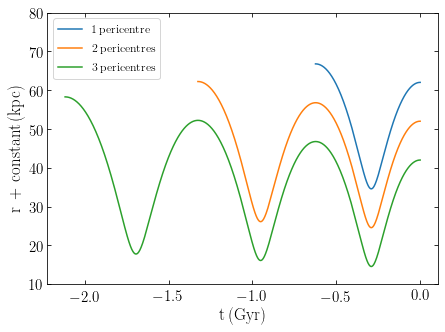

In [16]:
oo= of[MWI][SgrI][best_orbit]
pot=oo._pot
ftime= np.linspace(0.,0.5*1000/MTU,2001)
oo.integrate(ftime,pot)
oo= oo(ftime[-1])
oo.flip()
fulltime= np.linspace(0,-5.5*1000/MTU,2001)
oo.integrate(fulltime,pot)

r= oo.r(oo.time())

i= np.linspace(0,2000,2001)

peaks= (abs(r)>np.roll(abs(r),1))*(abs(r)>np.roll(abs(r),-1))*(i!=0)*(i!=len(oo.time())-1)
peakloc= i[peaks].astype(int)

t1= np.linspace(0.,oo.time()[peakloc[1]]-oo.time()[peakloc[0]],2001)
t2= np.linspace(0.,oo.time()[peakloc[2]]-oo.time()[peakloc[0]],2001)
t3= np.linspace(0.,oo.time()[peakloc[3]]-oo.time()[peakloc[0]],2001)

oo1= oo(oo.time()[peaks][0])
oo1.integrate(t1,oo._pot)
oo2= oo(oo.time()[peaks][0])
oo2.integrate(t2,oo._pot)
oo3= oo(oo.time()[peaks][0])
oo3.integrate(t3,oo._pot)

plt.figure(figsize=(7,5))

plt.plot(oo1.time()*MTU/1000.,oo1.r(oo1.time())*MLU+20,label=r'$\mathrm{1\,pericentre}$')
plt.plot(oo2.time()*MTU/1000.,oo2.r(oo2.time())*MLU+10,label=r'$\mathrm{2\,pericentres}$')
plt.plot(oo3.time()*MTU/1000.,oo3.r(oo3.time())*MLU,label=r'$\mathrm{3\,pericentres}$')

plt.ylim([10,80])
plt.xlabel(r'$\mathrm{t\, (Gyr)}$')
plt.ylabel(r'$\mathrm{r\,+\,constant\, (kpc)}$')
plt.legend()

print(FilePath+'MW'+str(MWI)+'_SGR'+str(SgrI)+'_1apo')
with open(FilePath+'data/Orbits/ModelOrbits/MW'+str(MWI)+'_SGR'+str(SgrI)+'_1apo','wb') as f1,\
     open(FilePath+'data/Orbits/ModelOrbits/MW'+str(MWI)+'_SGR'+str(SgrI)+'_2apo','wb') as f2,\
     open(FilePath+'data/Orbits/ModelOrbits/MW'+str(MWI)+'_SGR'+str(SgrI)+'_3apo','wb') as f3:
    pickle.dump(oo1,f1)
    pickle.dump(oo2,f2)
    pickle.dump(oo3,f3)

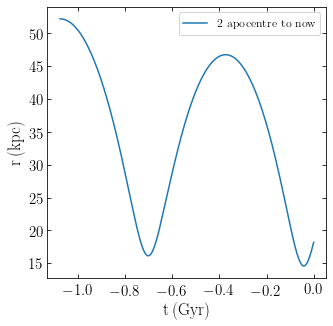

In [17]:
t= of[MWI][SgrI][best_orbit].time()
r= of[MWI][SgrI][best_orbit].r(t)

peaks= (abs(r)>np.roll(abs(r),1))*(abs(r)>np.roll(abs(r),-1))*(t!=t[0])*(t!=t[-1])

t2apo2now= np.linspace(t[0],t[peaks][1],2001)

oo2apo2now= of[MWI][SgrI][best_orbit](0.)
oo2apo2now.integrate(t2apo2now,of[MWI][SgrI][best_orbit]._pot)

plt.figure()
plt.plot(oo2apo2now.time()*MTU/1000.,oo2apo2now.r(oo2apo2now.time())*MLU,label=r'$\mathrm{2\,\,apocentre\,\,to\,\,now}$')
plt.xlabel(r'$\mathrm{t\, (Gyr)}$')
plt.ylabel(r'$\mathrm{r\, (kpc)}$')
plt.legend()

with open(FilePath+'data/Orbits/ModelOrbits/MW'+str(MWI)+'_SGR'+str(SgrI)+'_2apo2now','wb') as f1:
    pickle.dump(oo2apo2now,f1)

Text(0.5,0,'$\\mathrm{v_{los}}$')

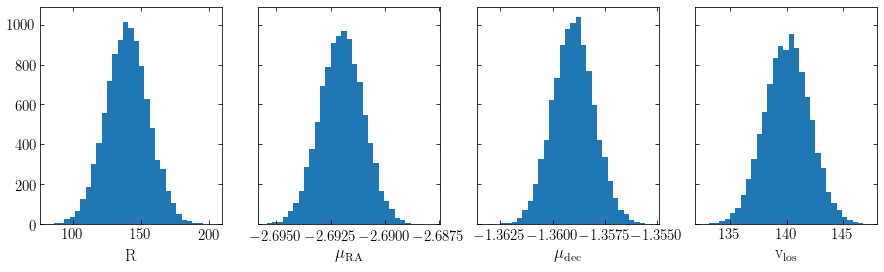

In [18]:
fig,ax= plt.subplots(1,4,sharey=True,figsize=(15,4))

ax[0].hist(of[0,0].R(of[0,0].time()[0],ro=of[0,0]._ro,vo=of[0,0]._vo)*MLU,bins=31,color='C0')
ax[1].hist(of[0,0].pmra(of[0,0].time()[0],ro=of[0,0]._ro,vo=of[0,0]._vo),bins=31,color='C0')
ax[2].hist(of[0,0].pmdec(of[0,0].time()[0],ro=of[0,0]._ro,vo=of[0,0]._vo),bins=31,color='C0')
ax[3].hist(of[0,0].vlos(of[0,0].time()[0],ro=of[0,0]._ro,vo=of[0,0]._vo),bins=31,color='C0')
ax[0].set_xlabel(r'$\mathrm{R}$')
ax[1].set_xlabel(r'$\mathrm{\mu_{RA}}$')
ax[2].set_xlabel(r'$\mathrm{\mu_{dec}}$')
ax[3].set_xlabel(r'$\mathrm{v_{los}}$')